In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.FolderStructure import FolderStructure
from lib.data.DriftData import DriftData
from lib.data.SeeFloor import SeeFloor
from lib.data.RedDotsData import RedDotsData
from lib.data.BadFramesData import BadFramesData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"

#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

#rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
#videoFileName = "V2"

rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6236_19"
videoFileName = "V1"

folderStruct = FolderStructure(rootDir, videoFileName)

#drifts = DriftData.createFromFile(folderStruct.getRawDriftsFilepath())
#data = drifts.getDF()
#drifts.getCount()
sf = SeeFloor.createFromFolderStruct(folderStruct)

In [2]:
#drifts.interpolate()
#data = drifts.getDF()
#sf.saveToFile()
ddf = sf.getDF() 

c:\old\python27\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


26813

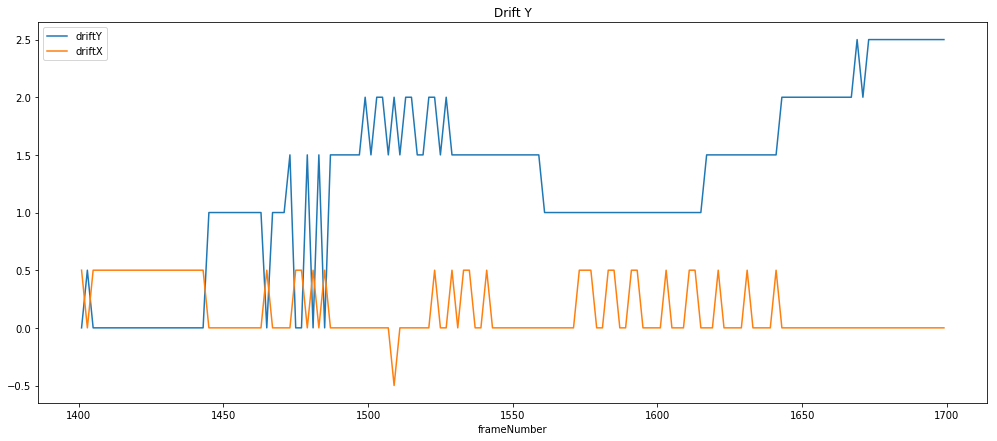

In [3]:
#seefloorFilepath = folderStruct.getSeefloorFilepath()
#badFrames = BadFramesData.createFromFile(folderStruct)
#rdd = RedDotsData(folderStruct)
#sf = SeeFloor(drifts, badFrames, rdd)

ddf.loc[(ddf['frameNumber'] > 1400)&(ddf['frameNumber'] < 1700)].plot( x='frameNumber', y=['driftY','driftX'],figsize=(17,7), title="Drift Y")#.savefig('MaximPlotDriftY.png', dpi=300)
#plt.gca().grid(which='major', axis='both', linestyle='--') 
len(ddf.index)

In [4]:
#data.loc[(data['frameNumber'] > 9390)].head(30)

In [5]:
#ddf[frameNumber,	driftX	driftY	distance	mm_per_pixel]
ddf.loc[(ddf['frameNumber'] >= 1391)].head(15) #11125.122565

,frameNumber,driftX,driftY,distance,mm_per_pixel,driftY_mm,driftX_mm,driftY_sum_mm,driftX_sum_mm,bottom_corner_mm
1332,1391,0.50,0.00,203.256095,1.475971,0.000000,0.737985,2228.048222,-357.346717,3822.096364
1333,1392,0.25,0.50,203.285907,1.475754,0.737877,0.368939,2228.786099,-356.977779,3822.600470
1334,1393,0.00,1.00,203.315912,1.475536,1.475536,0.000000,2230.261635,-356.977779,3823.840795
1335,1394,0.00,1.00,203.346109,1.475317,1.475317,0.000000,2231.736952,-356.977779,3825.079465
1336,1395,0.00,1.00,203.376498,1.475097,1.475097,0.000000,2233.212049,-356.977779,3826.316478
1337,1396,0.25,0.50,203.178837,1.476532,0.738266,0.369133,2233.950315,-356.608646,3828.604581
1338,1397,0.50,0.00,202.981181,1.477970,0.000000,0.738985,2233.950315,-355.869661,3830.157401
1339,1398,0.25,0.50,202.783530,1.479410,0.739705,0.369853,2234.690020,-355.499809,3832.452916
1340,1399,0.00,1.00,202.585883,1.480853,1.480853,0.000000,2236.170873,-355.499809,3835.492579
1341,1400,0.25,0.50,202.388241,1.482300,0.741150,0.370575,2236.912023,-355.129234,3837.795547


In [6]:
ddf.loc[(ddf['driftY_sum_mm'] < 442.423981)].max()["frameNumber"]

301.0

In [7]:
int(ddf.loc[(ddf['frameNumber'] == 61)]["bottom_corner_mm"])

1632

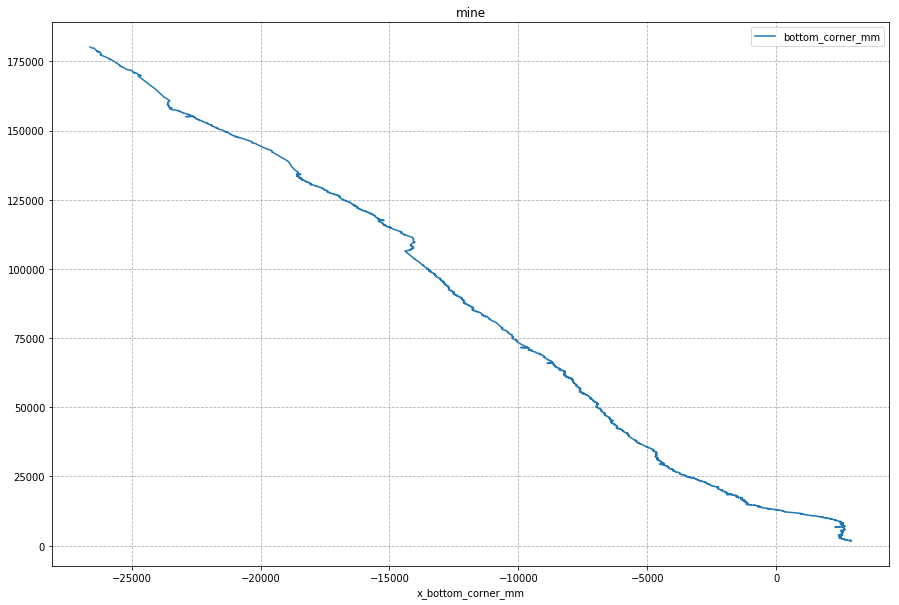

In [10]:
ddf["x_bottom_corner_mm"] = 1920 * ddf["mm_per_pixel"] + ddf["driftX_sum_mm"]

ddf.plot(x='x_bottom_corner_mm', y=['bottom_corner_mm'],figsize=(15,10), title="path")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines
